# Let's understand MET dataset

load `.csv` file and analyze the data

In [1]:
import numpy as np
import copy
import os
import sys
import math
from tqdm import tqdm
from scripts import dataset
from scripts import config

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# Let's load dataset
dataset_name = 'met'

if dataset_name not in ['met', 'lsp', 'mpii']:
    raise ValueError('Unknown dataset: {}'.format(dataset_name))

if dataset_name == 'mpii':
    CSV_FILENAME = os.path.join(config.MPII_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.MPII_DATASET_ROOT, 'images')
    symmetric_joints = "[[12, 13], [11, 14], [10, 15], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -100500
elif dataset_name == 'lsp': # LSP dataset
    CSV_FILENAME = os.path.join(config.LSP_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.LSP_DATASET_ROOT, 'images')
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
elif dataset_name == 'met': # MET dataset
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity1.csv') # test only one image
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity.csv')
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity_with_head.csv')
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity_wo.csv')
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity_wo_ub.csv') # cleaned up
    CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity_20180618.csv') # joint rechecked! (2018.06.18) 
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity-met_n10.csv') # joint rechecked! (2018.06.18)    
    # for debugging
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'writing46.csv')  # with valid joints info
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'writing46nv.csv')  # without valid joints info

    IMG_PATH_PREFIX = os.path.join(config.MET_DATASET_ROOT)
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
else:
    pass
 
    
print(CSV_FILENAME)
print(IMG_PATH_PREFIX)

met_dataset = dataset.PoseDataset(
    CSV_FILENAME,
    IMG_PATH_PREFIX, 227,
    fliplr=False, rotate=False,
    shift=None,
    #bbox_extension_range=(1.0, 1.0),
    bbox_extension_range=(1.4, 1.4),
    coord_normalize=True,
    gcn=True,
    fname_index=0,
    joint_index=1,
    symmetric_joints=symmetric_joints,
    ignore_label=ignore_label,
    should_return_bbox=True,
    should_downscale_images=True,
    downscale_height=400
)


15it [00:00, 124.72it/s]

/var/data/MET2/activity_20180618.csv
/var/data/MET2
Reading dataset from /var/data/MET2/activity_20180618.csv
Downscale images to the height 400px


33it [00:00, 90.22it/s] 

[26] /var/data/MET2/image/office activities/walking about/33.png contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [545. 573.]
 [493. 411.]
 [437. 408.]
 [451. 577.]
 [324. 701.]
 [502. 360.]
 [400. 291.]
 [472. 160.]
 [487. 147.]
 [497. 287.]
 [587. 314.]
 [527. 120.]
 [524.  12.]]
[33] /var/data/MET2/image/office activities/walking about/4.png contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [200. 412.]
 [186. 333.]
 [251. 324.]
 [246. 401.]
 [254. 447.]
 [152. 307.]
 [160. 247.]
 [166. 174.]
 [278. 162.]
 [293. 243.]
 [296. 289.]
 [214. 141.]
 [213.  82.]]
[34] /var/data/MET2/image/office activities/walking about/40.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [257. 598.]
 [221. 420.]
 [339. 426.]
 [299. 590.]
 [294. 675.]
 [137. 420.]
 [164. 330.]
 [193. 185.]
 [377. 175.]
 [404. 327.]
 [427. 418.]
 [287. 161.]
 [300.  48.]]


53it [00:00, 85.83it/s]

[40] /var/data/MET2/image/office activities/walking about/46.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 0 1 1 1 1 1]
[[ 73. 254.]
 [ 72. 206.]
 [ 71. 154.]
 [ 91. 148.]
 [ 91. 191.]
 [135. 244.]
 [ 39. 136.]
 [ 58. 111.]
 [ -1.  -1.]
 [109. 138.]
 [118. 100.]
 [ 97.  59.]
 [ 61.  53.]
 [ 37.  21.]]
[49] /var/data/MET2/image/office activities/walking about/54.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [264. 450.]
 [302. 294.]
 [273. 317.]
 [269. 449.]
 [391. 545.]
 [272. 243.]
 [342. 204.]
 [333. 120.]
 [240. 126.]
 [238. 216.]
 [213. 263.]
 [282.  77.]
 [259.  12.]]
[53] /var/data/MET2/image/office activities/walking about/58.png contains non-valid joints
[1 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[453. 753.]
 [443. 676.]
 [408. 454.]
 [548. 454.]
 [512. 671.]
 [ -1.  -1.]
 [365. 337.]
 [391. 361.]
 [399. 211.]
 [600. 228.]
 [583. 388.]
 [586. 501.]
 [500. 169.]
 [494.  44.]]
[60] /var/data/MET2/image/office activities/writing/1.bmp contains non-valid joints
[0 0

137it [00:00, 165.50it/s]

[96] /var/data/MET2/image/office activities/writing/41.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [115. 128.]
 [ 77. 119.]
 [116.  68.]
 [187.  82.]
 [200. 125.]
 [209.  76.]
 [160.  69.]
 [145.  18.]]
[98] /var/data/MET2/image/office activities/writing/43.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 34. 155.]
 [ 23. 146.]
 [ 49. 116.]
 [138. 116.]
 [125. 165.]
 [112. 113.]
 [ 89. 117.]
 [ 68.  44.]]
[99] /var/data/MET2/image/office activities/writing/44.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 99. 144.]
 [ 50. 153.]
 [ 46.  76.]
 [120.  76.]
 [150. 112.]
 [172. 111.]
 [ 90.  75.]
 [119.  23.]]
[101] /var/data/MET2/image/office activities/writing/46.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1

160it [00:01, 122.56it/s]

[140] /var/data/MET2/image/office activities/reading.seated/28.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [764. 523.]
 [852. 561.]
 [860. 337.]
 [888. 379.]
 [927. 627.]
 [748. 629.]
 [810. 308.]
 [638. 201.]]
[142] /var/data/MET2/image/office activities/reading.seated/3.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [121. 133.]
 [ 70. 127.]
 [115.  81.]
 [174.  80.]
 [218. 131.]
 [174. 131.]
 [146.  84.]
 [141.  32.]]
[148] /var/data/MET2/image/office activities/reading.seated/35.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[-1.000e+00 -1.000e+00]
 [ 8.460e+02  6.150e+02]
 [ 1.008e+03  5.600e+02]
 [ 1.227e+03  5.730e+02]
 [ 9.380e+02  6.470e+02]
 [-1.000e+00 -1.000e+00]
 [ 9.480e+02  5.710e+02]
 [ 9.690e+02  5.100e+02]
 [ 9.650e+02  3.290e+02]
 [ 1.240e+03  2.950e+02]
 [ 1.284e+03  4.

209it [00:01, 138.56it/s]

[174] /var/data/MET2/image/office activities/reading.seated/59.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [264. 476.]
 [361. 622.]
 [477. 468.]
 [611. 532.]
 [357. 703.]
 [282. 465.]
 [511. 420.]
 [523. 236.]]
[176] /var/data/MET2/image/office activities/reading.seated/60.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [121. 187.]
 [  4. 261.]
 [ 78. 141.]
 [216. 164.]
 [248. 274.]
 [322. 230.]
 [169. 135.]
 [192.  40.]]
[178] /var/data/MET2/image/office activities/reading.seated/8.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [266. 310.]
 [137. 360.]
 [ 99. 118.]
 [281. 135.]
 [279. 348.]
 [388. 251.]
 [222. 128.]
 [265.   5.]]
[179] /var/data/MET2/image/office activities/reading.seated/9.bmp contains non-vali

281it [00:01, 161.36it/s]

[244] /var/data/MET2/image/office activities/lifting.packing/lifting/13.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ 86. 299.]
 [ 84. 209.]
 [121. 208.]
 [127. 296.]
 [ -1.  -1.]
 [ 55. 197.]
 [ 36. 164.]
 [ 46. 113.]
 [128.  92.]
 [157. 141.]
 [165. 194.]
 [ 72.  86.]
 [ 55.  38.]]
[251] /var/data/MET2/image/office activities/lifting.packing/lifting/2.png contains non-valid joints
[1 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[102. 311.]
 [ 89. 266.]
 [ 97. 209.]
 [121. 218.]
 [112. 284.]
 [ -1.  -1.]
 [ 67. 166.]
 [109. 170.]
 [116. 115.]
 [151. 115.]
 [154. 169.]
 [116. 176.]
 [133. 103.]
 [121.  64.]]
No valid joint in image/office activities/lifting.packing/lifting/22.jpg[[-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]][[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[258] /var/data/MET2/image/office activities/l

307it [00:01, 155.66it/s]

[293] /var/data/MET2/image/office activities/lifting.packing/lifting/59.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [ 2.580e+02  1.138e+03]
 [ 5.350e+02  1.118e+03]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [ 9.500e+01  9.300e+02]
 [ 1.060e+02  7.690e+02]
 [ 1.990e+02  5.060e+02]
 [ 5.530e+02  5.210e+02]
 [ 6.620e+02  7.170e+02]
 [ 7.500e+02  8.370e+02]
 [ 3.750e+02  4.480e+02]
 [ 3.800e+02  2.180e+02]]
[294] /var/data/MET2/image/office activities/lifting.packing/lifting/6.png contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ 28. 229.]
 [107. 235.]
 [ -1.  -1.]
 [ -1.  -1.]
 [114. 198.]
 [ 65. 211.]
 [ 32. 118.]
 [105. 116.]
 [103. 211.]
 [157. 199.]
 [ 74. 104.]
 [ 65.  28.]]
[295] /var/data/MET2/image/office activities/lifting.packing/lifting/60.jpg contains non-valid joints
[0 0 1 1 0 0 0 1 1 0 0 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [575. 853.]
 [734. 818.]
 [ -1.  -1.]
 [ -1.

329it [00:02, 139.12it/s]

[322] /var/data/MET2/image/office activities/lifting.packing/packing/30.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [299. 652.]
 [317. 461.]
 [472. 458.]
 [476. 651.]
 [ -1.  -1.]
 [290. 345.]
 [292. 339.]
 [303. 193.]
 [500. 189.]
 [566. 309.]
 [612. 389.]
 [410. 178.]
 [414.  39.]]
[323] /var/data/MET2/image/office activities/lifting.packing/packing/31.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [400. 344.]
 [404. 175.]
 [469. 165.]
 [419. 356.]
 [ -1.  -1.]
 [266. 263.]
 [306. 207.]
 [290. 126.]
 [333. 113.]
 [360. 241.]
 [332. 336.]
 [309. 117.]
 [220.  93.]]
[324] /var/data/MET2/image/office activities/lifting.packing/packing/32.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[-1.000e+00 -1.000e+00]
 [ 2.310e+02  1.030e+03]
 [ 2.180e+02  7.370e+02]
 [ 2.930e+02  7.290e+02]
 [ 3.470e+02  1.029e+03]
 [-1.000e+00 -1.000e+00]
 [ 7.890e+02  5.400e+02]
 [ 5.370e+02  4.800e+02]
 [ 3.570e+02  2.550e+02]
 [ 4.070e+02 

346it [00:02, 129.67it/s]

[333] /var/data/MET2/image/office activities/lifting.packing/packing/40.png contains non-valid joints
[0 0 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [293. 794.]
 [598. 771.]
 [570. 988.]
 [ -1.  -1.]
 [299. 690.]
 [197. 566.]
 [290. 274.]
 [627. 260.]
 [639. 503.]
 [706. 716.]
 [464. 253.]
 [525.  52.]]
Skipping joint with incorrect joints coordinates. They are out of the image.
image: /var/data/MET2/image/office activities/lifting.packing/packing/41.png, joint: [421. 779.], im.shape: (328, 622)
[336] /var/data/MET2/image/office activities/lifting.packing/packing/44.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [458. 789.]
 [435. 555.]
 [557. 554.]
 [557. 741.]
 [ -1.  -1.]
 [723. 612.]
 [601. 490.]
 [511. 281.]
 [656. 310.]
 [662. 472.]
 [656. 603.]
 [631. 281.]
 [705. 203.]]
[337] /var/data/MET2/image/office activities/lifting.packing/packing/45.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [641. 882.]
 [634. 648.]
 [8

360it [00:02, 124.79it/s]

[347] /var/data/MET2/image/office activities/lifting.packing/packing/54.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [484. 825.]
 [439. 651.]
 [583. 602.]
 [618. 832.]
 [ -1.  -1.]
 [370. 460.]
 [326. 446.]
 [370. 287.]
 [611. 291.]
 [647. 448.]
 [583. 526.]
 [465. 264.]
 [518. 125.]]
[348] /var/data/MET2/image/office activities/lifting.packing/packing/55.png contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [513. 818.]
 [ 38. 995.]
 [ 21. 560.]
 [217. 446.]
 [372. 571.]
 [598. 560.]
 [171. 433.]
 [345. 238.]]
[351] /var/data/MET2/image/office activities/lifting.packing/packing/58.png contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [177. 333.]
 [306. 342.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 64. 162.]
 [ 83. 125.]
 [219. 104.]
 [349. 162.]
 [340. 320.]
 [223. 288.]
 [259. 120.]
 [255.   5.]]
[352] /var/data/MET2/image/office activities/lifting.pa

393it [00:02, 131.66it/s]

[372] /var/data/MET2/image/office activities/filing.seated/22.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [222. 460.]
 [122. 431.]
 [ 98. 240.]
 [320. 212.]
 [337. 351.]
 [401. 372.]
 [237. 212.]
 [234.  32.]]
[374] /var/data/MET2/image/office activities/filing.seated/24.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 0 1 1 1]
[[262. 449.]
 [227. 390.]
 [114. 395.]
 [126. 376.]
 [224. 370.]
 [251. 447.]
 [182. 339.]
 [129. 367.]
 [122. 281.]
 [115. 264.]
 [ -1.  -1.]
 [157. 274.]
 [126. 246.]
 [149. 208.]]
[375] /var/data/MET2/image/office activities/filing.seated/25.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [350. 410.]
 [426. 359.]
 [518. 394.]
 [397. 465.]
 [ -1.  -1.]
 [367. 214.]
 [441. 231.]
 [442. 127.]
 [528. 177.]
 [408. 325.]
 [303. 281.]
 [483. 107.]
 [427.   0.]]
[376] /var/data/MET2/image/office activities/filing.seated/26.jpg contains non-valid 

448it [00:03, 139.01it/s]

[410] /var/data/MET2/image/office activities/filing.seated/58.jpg contains non-valid joints
[0 0 0 0 1 1 1 1 1 1 1 1 0 1]
[[-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [ 2.193e+03  2.551e+03]
 [ 2.275e+03  2.225e+03]
 [ 9.170e+02  1.892e+03]
 [ 4.630e+02  1.559e+03]
 [ 9.800e+02  9.060e+02]
 [ 2.000e+03  1.013e+03]
 [ 2.024e+03  1.662e+03]
 [ 1.618e+03  1.765e+03]
 [-1.000e+00 -1.000e+00]
 [ 1.937e+03  2.850e+02]]
[411] /var/data/MET2/image/office activities/filing.seated/59.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 78. 453.]
 [105. 610.]
 [370. 392.]
 [854. 523.]
 [580. 803.]
 [295. 609.]
 [611. 454.]
 [728. 116.]]
[412] /var/data/MET2/image/office activities/filing.seated/6.bmp contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 0 1 1 1]
[[ 81. 165.]
 [ 83. 141.]
 [ 55. 138.]
 [ 51. 130.]
 [ 77. 139.]
 [ 72. 163.]
 [ 89. 117.]
 [ 75. 121

513it [00:03, 147.51it/s]

[484] /var/data/MET2/image/miscellaneous occupational activity/cooking/8.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [104. 161.]
 [109. 135.]
 [142. 129.]
 [150. 156.]
 [ -1.  -1.]
 [ 80. 114.]
 [ 73.  88.]
 [ 89.  60.]
 [142.  59.]
 [156.  89.]
 [150. 105.]
 [110.  56.]
 [ 93.  30.]]
[485] /var/data/MET2/image/miscellaneous occupational activity/cooking/9.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ 42. 159.]
 [ 80. 158.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 45. 110.]
 [ 27. 124.]
 [ 42.  69.]
 [111.  68.]
 [124.  93.]
 [136. 105.]
 [ 78.  64.]
 [ 88.  21.]]
[486] /var/data/MET2/image/miscellaneous occupational activity/cooking/10.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 0]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [183. 105.]
 [264. 107.]
 [308.  37.]
 [351.  47.]
 [314. 178.]
 [210. 167.]
 [301.  27.]
 [ -1.  -1.]]
[487] /var/data/MET2/image/miscellaneous occupation

538it [00:03, 146.24it/s]

[518] /var/data/MET2/image/miscellaneous occupational activity/cooking/42.PNG contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [176. 397.]
 [295. 376.]
 [ -1.  -1.]
 [ -1.  -1.]
 [514. 385.]
 [323. 292.]
 [296. 143.]
 [433. 172.]
 [421. 276.]
 [454. 355.]
 [417. 149.]
 [539.  89.]]
[519] /var/data/MET2/image/miscellaneous occupational activity/cooking/43.PNG contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [121. 252.]
 [175. 255.]
 [ -1.  -1.]
 [ -1.  -1.]
 [119. 219.]
 [ 90. 181.]
 [101. 110.]
 [200. 105.]
 [202. 179.]
 [184. 243.]
 [147.  90.]
 [127.  49.]]
[520] /var/data/MET2/image/miscellaneous occupational activity/cooking/44.PNG contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [297. 323.]
 [312. 275.]
 [329. 117.]
 [448. 176.]
 [443. 299.]
 [357. 364.]
 [384. 160.]
 [352.  90.]]
[521] /var/data/MET2/image/miscellaneous occupati

593it [00:03, 152.69it/s]

[566] /var/data/MET2/image/miscellaneous occupational activity/house cleaning/30.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[-1.000e+00 -1.000e+00]
 [ 6.650e+02  9.850e+02]
 [ 6.810e+02  6.970e+02]
 [ 9.210e+02  6.550e+02]
 [ 9.370e+02  9.600e+02]
 [-1.000e+00 -1.000e+00]
 [ 7.020e+02  6.440e+02]
 [ 4.590e+02  6.100e+02]
 [ 6.260e+02  3.370e+02]
 [ 1.027e+03  2.770e+02]
 [ 1.178e+03  5.410e+02]
 [ 1.351e+03  7.280e+02]
 [ 8.840e+02  3.310e+02]
 [ 8.560e+02  2.100e+01]]
[569] /var/data/MET2/image/miscellaneous occupational activity/house cleaning/33.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [417. 531.]
 [533. 494.]
 [ -1.  -1.]
 [ -1.  -1.]
 [637. 532.]
 [523. 503.]
 [464. 328.]
 [601. 246.]
 [609. 356.]
 [652. 443.]
 [546. 314.]
 [542. 153.]]
[571] /var/data/MET2/image/miscellaneous occupational activity/house cleaning/35.png contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 0 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [165. 288.]
 [15

619it [00:03, 155.20it/s]

[618] /var/data/MET2/image/miscellaneous occupational activity/machine work.light/22.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [ 1.033e+03  1.469e+03]
 [ 7.520e+02  1.629e+03]
 [ 5.790e+02  8.220e+02]
 [ 4.510e+02  7.270e+02]
 [ 7.180e+02  1.201e+03]
 [ 1.002e+03  8.540e+02]
 [ 7.270e+02  6.240e+02]
 [ 8.200e+02  4.000e+01]]
[619] /var/data/MET2/image/miscellaneous occupational activity/machine work.light/23.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [110. 507.]
 [255. 492.]
 [ -1.  -1.]
 [ -1.  -1.]
 [262. 379.]
 [ 69. 376.]
 [188. 238.]
 [375. 209.]
 [418. 353.]
 [487. 514.]
 [356. 240.]
 [488. 132.]]
[620] /var/data/MET2/image/miscellaneous occupational activity/machine work.light/24.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1

673it [00:04, 154.85it/s]

[631] /var/data/MET2/image/miscellaneous occupational activity/machine work.light/35.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [154. 112.]
 [111. 134.]
 [ 60.  98.]
 [ 83.  84.]
 [119.  99.]
 [167.  96.]
 [ 93.  79.]
 [ 84.  20.]]
[632] /var/data/MET2/image/miscellaneous occupational activity/machine work.light/36.jpg contains non-valid joints
[1 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[539. 517.]
 [505. 397.]
 [725. 407.]
 [794. 533.]
 [464. 524.]
 [ -1.  -1.]
 [474. 351.]
 [602. 306.]
 [714. 173.]
 [680. 335.]
 [506. 443.]
 [353. 385.]
 [570. 244.]
 [622.  77.]]
[633] /var/data/MET2/image/miscellaneous occupational activity/machine work.light/37.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [169. 397.]
 [ 61. 429.]
 [187. 406.]
 [365. 451.]
 [148. 528.]
 [309. 470.]
 [201. 386.]
 [181. 207.]
 [304. 244.]
 [369. 333.]
 [479. 350.]
 [310. 229.]
 [328.  55.]]
[634] /var/data/

717it [00:04, 155.79it/s]

[688] /var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/38.jpg contains non-valid joints
[0 0 1 1 1 1 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [333. 302.]
 [225. 265.]
 [266. 436.]
 [127. 384.]
 [595. 381.]
 [560. 219.]
 [516.  45.]
 [332.  42.]
 [182.  99.]
 [290. 226.]
 [454.  76.]
 [602.  14.]]
[689] /var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/39.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [ 1.076e+03  6.840e+02]
 [ 1.410e+03  7.400e+02]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [ 9.740e+02  5.200e+02]
 [ 8.800e+02  3.760e+02]
 [ 8.780e+02  2.280e+02]
 [ 1.332e+03  2.360e+02]
 [ 1.396e+03  6.520e+02]
 [ 1.078e+03  6.560e+02]
 [ 1.104e+03  3.230e+02]
 [ 9.400e+02  1.320e+02]]
[690] /var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/4.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [109. 204.]
 [1

785it [00:04, 163.27it/s]

[729] /var/data/MET2/image/resting/reclining/20.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ 46.  85.]
 [115. 132.]
 [159. 158.]
 [ 53. 111.]
 [ -1.  -1.]
 [128. 102.]
 [133. 113.]
 [210.  76.]
 [267.  90.]
 [225. 148.]
 [180. 113.]
 [245.  66.]
 [255.  25.]]
[774] /var/data/MET2/image/resting/reclining/7.png contains non-valid joints
[1 1 1 0 0 1 1 1 1 0 1 1 1 1]
[[286. 146.]
 [203. 126.]
 [124. 121.]
 [ -1.  -1.]
 [ -1.  -1.]
 [281. 165.]
 [106.  92.]
 [ 49.  97.]
 [ 35.  70.]
 [ -1.  -1.]
 [104.  72.]
 [121.  80.]
 [ 54.  51.]
 [ 36.   8.]]
[793] /var/data/MET2/image/resting/seated.quiet/24.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ 98. 289.]
 [ 99. 253.]
 [168. 250.]
 [164. 287.]
 [ -1.  -1.]
 [ 85. 247.]
 [ 48. 201.]
 [ 78. 127.]
 [188. 123.]
 [209. 200.]
 [184. 242.]
 [132. 101.]
 [133.  45.]]


852it [00:05, 169.98it/s]

[795] /var/data/MET2/image/resting/seated.quiet/26.jpg contains non-valid joints
[1 1 0 0 1 1 1 1 1 1 1 1 1 1]
[[217. 557.]
 [215. 419.]
 [ -1.  -1.]
 [ -1.  -1.]
 [302. 421.]
 [282. 565.]
 [201. 377.]
 [192. 337.]
 [198. 269.]
 [324. 268.]
 [325. 333.]
 [314. 382.]
 [260. 231.]
 [260. 148.]]
[801] /var/data/MET2/image/resting/seated.quiet/31.jpg contains non-valid joints
[1 1 0 1 1 1 1 1 1 1 1 1 1 1]
[[ 95. 384.]
 [128. 281.]
 [ -1.  -1.]
 [220. 250.]
 [122. 255.]
 [ 87. 327.]
 [162. 159.]
 [161. 194.]
 [204. 146.]
 [255. 154.]
 [253. 220.]
 [208. 181.]
 [228. 132.]
 [215.  76.]]
[838] /var/data/MET2/image/resting/sleeping/10.png contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[[306. 184.]
 [234. 160.]
 [171. 136.]
 [179. 100.]
 [219.  66.]
 [266. 106.]
 [127. 114.]
 [105. 142.]
 [ 71. 117.]
 [ 92.  66.]
 [ 91.  40.]
 [ -1.  -1.]
 [ 79.  91.]
 [ 41.  67.]]
[844] /var/data/MET2/image/resting/sleeping/16.png contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[[308. 186.]
 [

957it [00:05, 186.94it/s]

[895] /var/data/MET2/image/resting/sleeping/8.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ 62. 274.]
 [101. 192.]
 [126. 186.]
 [ 83. 276.]
 [ -1.  -1.]
 [ 60.  85.]
 [ 38. 105.]
 [ 92.  86.]
 [105.  81.]
 [ 64. 163.]
 [ 48. 122.]
 [ 77.  73.]
 [ 72.  16.]]
955 images loaded
joints shape: (14, 2)


## Check the image list

In [3]:
# check loaded images
image_loaded=set(met_dataset.images)
print("Loaded {} images.".format(len(met_dataset.images)) + \
      "({} unique image IDs.)".format(len(image_loaded)))

# check loaded joints
joint_imageID = set([x[0] for x in met_dataset.joints])

print("Loaded {} joints.".format(len(met_dataset.joints)) + \
      "({} unique image IDs.)".format(len(joint_imageID)))

# 
print("image without joint info:")
print(image_loaded - joint_imageID)
print("joint info without image:")
joint_imageID - image_loaded

# further analysis for duplicated images in joints
print("duplicated image ID in joints:")
joint_imageID_dict = dict()
for x in met_dataset.joints:
    ID=x[0]
    joint=x[1]
    if (ID in joint_imageID_dict):
        # already included!
        print("{},{}".format(ID,joint))
    else:
        joint_imageID_dict[ID] = joint
        


Loaded 955 images.(955 unique image IDs.)
Loaded 955 joints.(955 unique image IDs.)
image without joint info:
set()
joint info without image:
duplicated image ID in joints:


## Images with invalid joints

number of images = 955
[529 630 728 725 632 540 943 934 946 949 919 930 947 946]


Text(0,0.5,'ratio of valid joints')

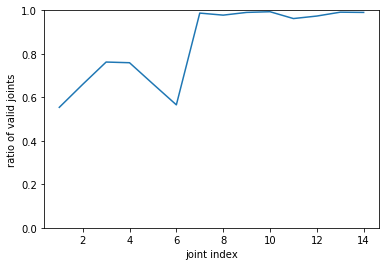

In [4]:
numImages = len(met_dataset.info)
print("number of images = {}".format(numImages))

validJoints = list()
for i, info in enumerate(met_dataset.info):
    #print(info[0])
    #validJoints.append(info[0])
    validJoints.append(info[0][:,0])   # only need X part of valid joints flag
validJoints = np.array(validJoints)  
#print(validJoints)

print(np.sum(validJoints,axis=0))

jointIndex = np.linspace(1,14,14)
plt.plot(jointIndex,np.sum(validJoints,axis=0)/numImages)
plt.ylim(0,1)
plt.xlabel('joint index')
plt.ylabel('ratio of valid joints')




## There are images without HEAD TOP!!!

89
image/office activities/writing/35.jpeg
377
image/office activities/filing.seated/29.jpg
484
image/miscellaneous occupational activity/cooking/10.jpg
485
image/miscellaneous occupational activity/cooking/11.jpg
487
image/miscellaneous occupational activity/cooking/13.jpg
598
image/miscellaneous occupational activity/machine work.light/4.png
634
image/miscellaneous occupational activity/machine work.light/40.jpg
655
image/miscellaneous occupational activity/machine work.sawing/1.jpg
711
image/miscellaneous occupational activity/machine work.sawing/57.jpg


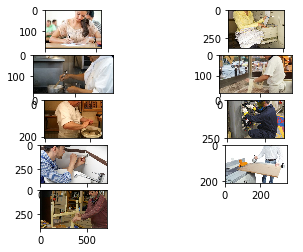

In [5]:
# images without joint 14 (head top)
idxMissing = list()
for i, info in enumerate(met_dataset.info):
    if validJoints[i,13] == 0:
        print(i)
        idxMissing.append(i)
        #print(info)

        image, joints, is_valid_joints, misc = met_dataset.get_example(i)
        print(misc['image_id'])
        #plt.imshow(image)

for i in range(len(idxMissing)):
    idx = idxMissing[i]
    #print(idx)
    plt.subplot(np.ceil(len(idxMissing)/2),2,i+1)

    img=met_dataset.get_original_image(idx)
    plt.imshow(img[:,:,::-1])

 

In [6]:

# # let's plot some of them  manually  
# plt.subplot(121)
# img=met_dataset.get_original_image(89)
# plt.imshow(img[:,:,::-1])

# plt.subplot(122)
# img=met_dataset.get_original_image(379)
# plt.imshow(img[:,:,::-1])


## Let's check joints in upper body

In [7]:
# how many images are missing any joint in upper body?    # increased from 61 to 90 (2018. 6. 18)
sum(np.sum(validJoints[:,6:],axis=1) != 8)

90

In [8]:
imageIDlistUB = list()
imageIDlistMissing = list()
idxListMissing = list()
for i, info in enumerate(met_dataset.info):
    image, joints, is_valid_joints, misc = met_dataset.get_example(i)
    #print(i, id)
        
    id = misc['image_id']
    if not np.all(validJoints[i,6:]):
        #print(i)
        #idxMissing.append(i)
        #print(info)


        
        imageIDlistMissing.append(id)
        idxListMissing.append(i)
    else:
        imageIDlistUB.append(id)

# for i in range(len(idxListMissing)):
#     idx = idxListMissing[i]
#     #print(idx)
#     plt.subplot(np.ceil(len(idxListMissing)/4),4,i+1)

#     img=met_dataset.get_original_image(idx)
#     plt.imshow(img[:,:,::-1])
#     plt.axis('off')

print(len(imageIDlistUB))
print(len(imageIDlistMissing))

865
90


In [9]:
#idxListMissing

## generate list with whole upper body joints!

In [10]:
import pandas as pd
from tools import met

# read the csv file again
MET2_joints=pd.read_csv(CSV_FILENAME,header=None) # ,index_col=0)
print(len(MET2_joints))

MET2_joints.columns=met.generateColumnNames(includeMET=False, includeLabel=False)
MET2_joints.head()


# find index of UB images
idxListUB = list()
for i, id in enumerate(MET2_joints["ID"]):
    if id in imageIDlistUB:
        #print(id)
        idxListUB.append(i)
    #else:
        #print("skipp {}".format(id))
#MET2_joints["ID"]=="image/office activities/walking about/1.png"

MET2_joints_UB = MET2_joints.loc[idxListUB]
print(MET2_joints.shape)
print(MET2_joints_UB.shape)

# # select images with whole upper-body joints and save to a file
# MET2_joints_UB = MET2_joints.loc[idxAllUB]
# MET2_joints_UB.head()
MET2_joints_UB.reset_index(drop=True, inplace=True)    # MUST RE-INDEX AFTER DROPNA!!!
print(len(MET2_joints_UB))

MET2_joints_UB.to_csv('activity_ub.csv',index=False, header=None)

957
(957, 43)
(865, 43)
865


In [11]:
MET2_joints.head()

,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,0
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,0
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,0,1,1,1,0,0
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,0
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,0,1,1,0,0,0,0,0


In [12]:
MET2_joints_UB.head()

,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,0
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,0
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,0,1,1,1,0,0
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,0
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,0,1,1,0,0,0,0,0


In [13]:
# make sure missing image is not included
misc['image_id']
MET2_joints_UB_re=pd.read_csv('activity_ub.csv',header=None) # ,index_col=0)

MET2_joints_UB_re.head()

for missingImageID in imageIDlistMissing:
    if np.sum(MET2_joints_UB_re[0] == missingImageID):
        print('problem!!!')
        print(missingImageID)


In [14]:
MET2_joints_UB_re[0]


0       image/office activities/walking about/1.png
1      image/office activities/walking about/10.png
2      image/office activities/walking about/11.jpg
3      image/office activities/walking about/12.jpg
4      image/office activities/walking about/13.jpg
5      image/office activities/walking about/14.png
6      image/office activities/walking about/15.png
7      image/office activities/walking about/16.png
8      image/office activities/walking about/17.jpg
9      image/office activities/walking about/18.png
10     image/office activities/walking about/19.png
11      image/office activities/walking about/2.png
12     image/office activities/walking about/20.jpg
13     image/office activities/walking about/21.png
14     image/office activities/walking about/22.png
15     image/office activities/walking about/23.png
16     image/office activities/walking about/24.png
17     image/office activities/walking about/25.png
18     image/office activities/walking about/26.png
19     image

### copy generated files

```
cp activity_ub.csv /var/data/MET2/
scp activity_ub.csv beta.inu.ac.kr:/var/data/MET2/
scp activity_ub.csv omega.inu.ac.kr:/var/data/MET2/
```

## Further analysis for MET & class lables
Code from `shuffleData.ipynb`

In [15]:
# give column names 
numJoints = 14
# prepare column names 
colNames = list()
colNames.append('ID')
for n in range(numJoints):
    colNames.append("x{}".format(n+1))
    colNames.append("y{}".format(n+1))    
for n in range(numJoints):
    colNames.append("v{}".format(n+1))
#print(colNames)

MET2_joints.columns = colNames
MET2_joints_UB.columns = colNames
MET2_joints.head()
MET2_joints_UB.head()

,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,0
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,0
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,0,1,1,1,0,0
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,0
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,0,1,1,0,0,0,0,0


OrderedDict([('resting/sleeping', 0.7), ('resting/reclining', 0.8), ('office activities/writing', 1.0), ('office activities/reading.seated', 1.0), ('resting.seated.quiet', 1.0), ('office activities/typing', 1.1), ('resting/standing.relaxed', 1.2), ('office activities/filing.seated', 1.2), ('office activities/filing.stand', 1.4), ('office activities/walking about', 1.7)])
resting/sleeping : MET = 0.7, 60 samples
resting/reclining : MET = 0.8, 60 samples
office activities/writing : MET = 1.0, 60 samples
office activities/reading.seated : MET = 1.0, 60 samples
resting.seated.quiet : MET = 1.0, 60 samples
office activities/typing : MET = 1.1, 60 samples
resting/standing.relaxed : MET = 1.2, 60 samples
office activities/filing.seated : MET = 1.2, 59 samples
office activities/filing.stand : MET = 1.4, 60 samples
office activities/walking about : MET = 1.7, 60 samples
[0.7, 0.8, 1.0, 1.0, 1.0, 1.1, 1.2, 1.2, 1.4, 1.7]
[60, 60, 60, 60, 60, 60, 60, 59, 60, 60]


/home/yyoo/src/deeppose/tools/met.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[colName][idx] = val


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v6,v7,v8,v9,v10,v11,v12,v13,v14,MET
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,1.7
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,1.7
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,1,1,1,0,0,1.7
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,1.7
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,1,1,0,0,0,0,0,1.7


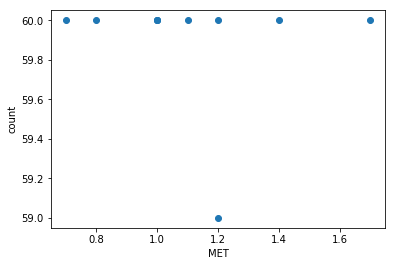

In [16]:
# 1. generate (activity,MET) dictionary in the increasing order of MET

#numClass=16     # whole model
numClass=10    # without objects

from tools import met
activity_MET = met.generate_activity_MET_dict(numClass)

print(activity_MET)
# for act in activity_MET:
#     print(act)

# 2, add MET value and count the number of each activity
MET2_joints, METs, counts =  met.parseActivity(MET2_joints, activity_MET, colName='MET', category=False)

# check
print(METs)
print(counts)
plt.plot(METs, counts, 'o')
plt.xlabel('MET')
plt.ylabel('count')


MET2_joints.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
OrderedDict([('resting/sleeping', 0), ('resting/reclining', 1), ('resting.seated.quiet', 2), ('resting/standing.relaxed', 3), ('office activities/reading.seated', 4), ('office activities/writing', 5), ('office activities/typing', 6), ('office activities/filing.seated', 7), ('office activities/filing.stand', 8), ('office activities/walking about', 9)])
resting/sleeping : label = 0, 60 samples
resting/reclining : label = 1, 60 samples
resting.seated.quiet : label = 2, 60 samples
resting/standing.relaxed : label = 3, 60 samples
office activities/reading.seated : label = 4, 60 samples
office activities/writing : label = 5, 60 samples
office activities/typing : label = 6, 60 samples
office activities/filing.seated : label = 7, 59 samples


/home/yyoo/src/deeppose/tools/met.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[colName][idx] = val


office activities/filing.stand : label = 8, 60 samples
office activities/walking about : label = 9, 60 samples
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[60, 60, 60, 60, 60, 60, 60, 59, 60, 60]


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v7,v8,v9,v10,v11,v12,v13,v14,MET,label
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,1.7,9
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,1.7,9
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,1,1,1,0,0,1.7,9
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,1.7,9
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,1,1,0,0,0,0,0,1.7,9


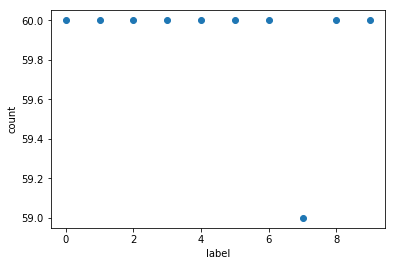

In [17]:
# 1. add class label index 

%load_ext autoreload
%autoreload 2
from tools import met

# New lable according to ASHARAE (2018. 6. 25)
activity_label = met.generate_activity_label_dict(numClass)
print(activity_label)


# 2. add label value and count the number of each activity
MET2_joints, labels, counts =  met.parseActivity(MET2_joints, activity_label, colName='label', category=True)

# check
print(labels)
print(counts)
plt.plot(labels, counts, 'o')
plt.xlabel('label')
plt.ylabel('count')


MET2_joints.head()


In [18]:
# save 
MET2_joints.to_csv('activity-met_n{}.csv'.format(numClass),index=False, header=None)
print(MET2_joints.shape)

(599, 45)


### repeat for UB data

resting/sleeping : MET = 0.7, 56 samples
resting/reclining : MET = 0.8, 59 samples
office activities/writing : MET = 1.0, 49 samples
office activities/reading.seated : MET = 1.0, 57 samples
resting.seated.quiet : MET = 1.0, 60 samples
office activities/typing : MET = 1.1, 58 samples

/home/yyoo/src/deeppose/tools/met.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[colName][idx] = val



resting/standing.relaxed : MET = 1.2, 60 samples
office activities/filing.seated : MET = 1.2, 36 samples
office activities/filing.stand : MET = 1.4, 35 samples
office activities/walking about : MET = 1.7, 59 samples
[0.7, 0.8, 1.0, 1.0, 1.0, 1.1, 1.2, 1.2, 1.4, 1.7]
[56, 59, 49, 57, 60, 58, 60, 36, 35, 59]


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v6,v7,v8,v9,v10,v11,v12,v13,v14,MET
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,1.7
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,1.7
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,1,1,1,0,0,1.7
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,1.7
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,1,1,0,0,0,0,0,1.7


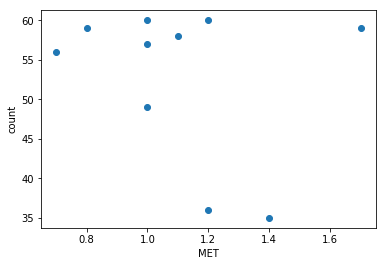

In [19]:
# add MET value and count the number of each activity


MET2_joints_UB, METs, counts =  met.parseActivity(MET2_joints_UB, activity_MET, colName='MET', category=False)

# check
print(METs)
print(counts)
plt.plot(METs, counts, 'o')
plt.xlabel('MET')
plt.ylabel('count')

MET2_joints_UB.head()

resting/sleeping : label = 0, 56 samples
resting/reclining : label = 1, 59 samples
resting.seated.quiet : label = 2, 60 samples


/home/yyoo/src/deeppose/tools/met.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[colName][idx] = val


resting/standing.relaxed : label = 3, 60 samples
office activities/reading.seated : label = 4, 57 samples
office activities/writing : label = 5, 49 samples
office activities/typing : label = 6, 58 samples
office activities/filing.seated : label = 7, 36 samples
office activities/filing.stand : label = 8, 35 samples
office activities/walking about : label = 9, 59 samples
[0.7, 0.8, 1.0, 1.0, 1.0, 1.1, 1.2, 1.2, 1.4, 1.7]
[56, 59, 60, 60, 57, 49, 58, 36, 35, 59]


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v7,v8,v9,v10,v11,v12,v13,v14,MET,label
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,1.7,9
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,1.7,9
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,1,1,1,0,0,1.7,9
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,1.7,9
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,1,1,0,0,0,0,0,1.7,9


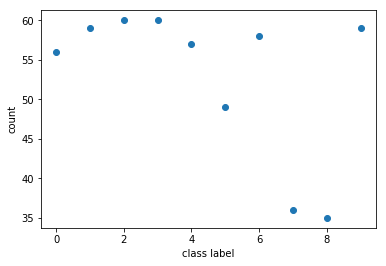

In [20]:
# add class label index 

MET2_joints_UB, labels, counts =  met.parseActivity(MET2_joints_UB, activity_label, colName='label', category=True)

# check
print(METs)
print(counts)
plt.plot(labels, counts, 'o')

plt.xlabel('class label')
plt.ylabel('count')

MET2_joints_UB.head()

In [21]:
MET2_joints_UB.to_csv('activity-met_n{}_ub.csv'.format(numClass),index=False, header=None)
print(MET2_joints_UB.shape)

(529, 45)


## copy generated files

### full model (16 classes)
```
cp activity-met_n16.csv /var/data/MET2/
cp activity-met_n16_ub.csv /var/data/MET2/

scp activity-met_n16.csv beta.inu.ac.kr:/var/data/MET2/
scp activity-met_n16_ub.csv beta.inu.ac.kr:/var/data/MET2/

scp activity-met_n16.csv omega.inu.ac.kr:/var/data/MET2/
scp activity-met_n16_ub.csv omega.inu.ac.kr:/var/data/MET2/

```

### part model (10 classes) (2018. 6. 25)
```
cp activity-met_n10.csv /var/data/MET2/
cp activity-met_n10_ub.csv /var/data/MET2/

scp activity-met_n10.csv beta.inu.ac.kr:/var/data/MET2/
scp activity-met_n10_ub.csv beta.inu.ac.kr:/var/data/MET2/

scp activity-met_n10.csv omega.inu.ac.kr:/var/data/MET2/
scp activity-met_n10_ub.csv omega.inu.ac.kr:/var/data/MET2/

```


In [ ]:
Test

In [ ]:
test_dataset = dataset.PoseDataset(
    "/var/data/MET2/n10_ub_head.csv", 
    "/var/data/MET2/",
    227,
    #fliplr=False, rotate=False,
    fliplr=True, rotate=False,
    #fliplr=True, rotate=True,
    shift=None,
    #bbox_extension_range=(1.0, 1.0),
    bbox_extension_range=(1.4, 1.4),
    coord_normalize=True,
    gcn=True,
    fname_index=0,
    joint_index=1,   # 14-point model
    symmetric_joints=symmetric_joints,
    ignore_label=ignore_label,
    should_return_bbox=True,
    should_downscale_images=True,
    downscale_height=400
)

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

imageIdx=0
image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)

plt.subplot(221)
plt.imshow(image[:,:,::-1])

imageIdx=imageIdx+1
image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)

plt.subplot(222)
plt.imshow(image[:,:,::-1])

imageIdx=imageIdx+1
image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)

plt.subplot(223)
plt.imshow(image[:,:,::-1])

imageIdx=imageIdx+1
image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)

plt.subplot(224)
plt.imshow(image[:,:,::-1])





In [ ]:


imageIdx = 0   # this image has only upper body
img=test_dataset.get_original_image(imageIdx)


image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)
valid_joints = joints[is_valid_joints].reshape(-1,2)

#bbox=misc['orig_tightest_bbox']
bbox=misc['bbox']


# plot joints
plt.subplot(121)
plt.imshow(img[:,:,::-1])
# plot joints
offsetX = bbox[0]
offsetY = bbox[1]
W = bbox[2]#-bbox[0]
H = bbox[3]#-bbox[1]
print(W,H)
plt.plot((valid_joints[:,0]+0.5)*W+offsetX, (valid_joints[:,1]+0.5)*H+offsetY,'or')

plt.subplot(122)
plt.imshow(image[:,:,::-1])